In [1]:
#add the services directory to the path so that we can import the modules
import sys
sys.path.append('../../')

#add the parent directory to the path so that we can import the modules
import sys
sys.path.append('..')

from src.hopsworks_fs import GetFeaturesFromTheStore
from src.config import config 
import pandas as pd

# Set display option to show all columns
pd.set_option('display.max_columns', None)  

2024-10-17 04:37:43,302 WARNING: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/897173
2024-10-17 04:37:44,731 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
from loguru import logger
logger.debug(f'Config: {config.model_dump()}')
#Instantiate the GetFeaturesFromTheStore class
get_features_from_the_store = GetFeaturesFromTheStore()
        
#retrieve the flights data from the hopsworks feature store
flights_data = get_features_from_the_store.get_features(live_or_historical=config.live_or_historical)
print(f"retrieved {flights_data.shape[0]} rows and {flights_data.shape[1]} columns")
#set the index to the current_flight_time column
flights_data.set_index('current_flight_time', inplace=True)
flights_data.head(5)

2024-10-17 04:37:45.003 | DEBUG    | __main__:<module>:2 - Config: {'feature_group_name': 'historical_flights_tracking_with_apm_data', 'feature_group_version': 1, 'feature_view_name': 'historical_flights_tracking_with_apm_view', 'feature_view_version': 1, 'hopsworks_project_name': 'Ramane', 'hopsworks_api_key': 'MxkTFcD7JWLb15l0.T6u5GKvw6thyaxkk6qLSYXcTCZr8efDc6yfuJehsaDxeUHBxebGbuKyfkJTib8b6', 'kafka_topic_name': 'historical_flights_with_apm', 'kafka_broker_address': 'localhost:19092', 'kafka_consumer_group': 'historical_flights_with_apm_consumer_primary_keys', 'live_or_historical': 'historical', 'last_n_minutes': None, 'comet_ml_api_key': 'dm9Y7P3rP2HsnOJ4RIvrW6ULw', 'comet_ml_project_name': 'real-time-ml-fuel-estimato', 'comet_ml_workspace': 'ramane23'}
2024-10-17 04:37:45.006 | DEBUG    | src.hopsworks_fs:get_features:362 - Getting the feature view


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (25.49s) 
retrieved 236329 rows and 55 columns


,aircraft_iata_code,aircraft_icao_code,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,airline_iata_code,airline_icao_code,airline_name,altitude,flight_level,arrival_airport_iata,arrival_airport_icao,arrival_city,departure_airport_iata,departure_airport_icao,departure_city,direction,flight_icao_number,flight_number,flight_id,flight_status,horizontal_speed,isground,latitude,longitude,vertical_speed,true_airspeed_ms,departure_country,arrival_country,route,departure_airport_lat,arrival_airport_lat,departure_airport_long,arrival_airport_long,engine_type,bypass_ratio,cruise_thrust,cruise_sfc,ei_nox_to,ei_nox_co,ei_nox_app,ei_nox_idl,ei_co_to,ei_co_co,ei_co_app,ei_co_idl,co2_flow,h2o_flow,nox_flow,co_flow,hc_flow,soot_flow,fuel_flow
current_flight_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1728846853,B77W,b77w,351533.800000,251289.968000,Jet,2,CX,CPA,Cathay Pacific,10972.8,FL360,HKG,VHHH,Hong Kong,LAX,KLAX,Los Angeles,240.98,CPA881,881,CX881,unknown,832.320,False,32.4508,132.345,0.0,832.320,United States,Hong Kong,Los Angeles - Hong Kong,33.942501,22.308901,-118.407997,113.915001,GE90-115B,7.10,NaN,NaN,51.068,36.44,16.166,5.511,0.125,0.137,2.16,34.578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1728846900,B77W,b77w,351533.800000,251289.968000,Jet,2,BR,EVA,EVA Air,10972.8,FL360,TPE,RCTP,Taipei,SFO,KSFO,San Francisco,238.02,EVA017,17,BR17,unknown,842.760,False,32.7915,132.606,0.0,842.760,United States,Taiwan,San Francisco - Taipei,37.619000,25.077700,-122.375000,121.233002,GE90-115B,7.10,NaN,NaN,51.068,36.44,16.166,5.511,0.125,0.137,2.16,34.578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1728846900,B748,b748,447695.304000,312071.296000,Jet,4,CX,CPA,Cathay Pacific,11582.4,FL380,HKG,VHHH,Hong Kong,ANC,PANC,Anchorage,241.07,CPA3283,3283,CX3283,unknown,823.140,False,32.6578,132.786,0.0,823.140,United States,Hong Kong,Anchorage - Hong Kong,61.174400,22.308901,-149.996002,113.915001,GEnx-2B67,8.00,NaN,NaN,31.200,17.94,9.580,4.430,0.170,0.280,2.53,18.950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1728846900,B38M,b38m,82190.870400,69308.857600,Jet,2,LJ,JNA,Sierra National Airlines,10668.0,FL350,ICN,RKSI,Seoul,MFM,VMMC,Macau,45.49,JNA722,722,LJ722,unknown,921.960,False,26.7944,122.623,0.0,921.960,Macau,South Korea,Macau - Seoul,22.149599,37.469101,113.592003,126.450996,LEAP-1B,8.50,NaN,NaN,30.390,17.53,10.260,4.740,0.150,0.160,1.49,16.190,3174.749509,1235.741107,18.915889,0.597245,0.298623,0.030140,1.004668
1728846900,A21N,a21n,94999.854888,79199.884752,Jet,2,BX,ABL,Coast Air,10058.4,FL330,ICN,RKSI,Seoul,BKK,VTBS,Bangkok,45.43,ABL748,748,BX748,unknown,863.028,False,27.0635,122.934,0.0,863.028,Thailand,South Korea,Bangkok - Seoul,13.681100,37.469101,100.747002,126.450996,PW1133G-JM,11.58,NaN,NaN,25.460,19.84,9.400,5.310,0.230,0.220,3.44,24.060,2783.658379,1083.512597,17.455495,1.173132,0.234626,0.026427,0.880905


In [3]:
import datetime
columns_to_drop = ['aircraft_icao_code', 'airline_iata_code', 'airline_icao_code', 'flight_level', 'arrival_airport_iata', 
                   'arrival_airport_icao', 'departure_airport_iata', 'departure_airport_icao', 'flight_icao_number', 'flight_number', 'flight_status', 'departure_airport_lat', 'departure_airport_long', 'arrival_airport_lat', 'arrival_airport_long'
                   ]

#drop the columns that are not needed
flights_data.drop(columns=columns_to_drop, inplace=True)
flights_data.head(5)

,aircraft_iata_code,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,airline_name,altitude,arrival_city,departure_city,direction,flight_id,horizontal_speed,isground,latitude,longitude,vertical_speed,true_airspeed_ms,departure_country,arrival_country,route,engine_type,bypass_ratio,cruise_thrust,cruise_sfc,ei_nox_to,ei_nox_co,ei_nox_app,ei_nox_idl,ei_co_to,ei_co_co,ei_co_app,ei_co_idl,co2_flow,h2o_flow,nox_flow,co_flow,hc_flow,soot_flow,fuel_flow
current_flight_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1728846853,B77W,351533.800000,251289.968000,Jet,2,Cathay Pacific,10972.8,Hong Kong,Los Angeles,240.98,CX881,832.320,False,32.4508,132.345,0.0,832.320,United States,Hong Kong,Los Angeles - Hong Kong,GE90-115B,7.10,NaN,NaN,51.068,36.44,16.166,5.511,0.125,0.137,2.16,34.578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1728846900,B77W,351533.800000,251289.968000,Jet,2,EVA Air,10972.8,Taipei,San Francisco,238.02,BR17,842.760,False,32.7915,132.606,0.0,842.760,United States,Taiwan,San Francisco - Taipei,GE90-115B,7.10,NaN,NaN,51.068,36.44,16.166,5.511,0.125,0.137,2.16,34.578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1728846900,B748,447695.304000,312071.296000,Jet,4,Cathay Pacific,11582.4,Hong Kong,Anchorage,241.07,CX3283,823.140,False,32.6578,132.786,0.0,823.140,United States,Hong Kong,Anchorage - Hong Kong,GEnx-2B67,8.00,NaN,NaN,31.200,17.94,9.580,4.430,0.170,0.280,2.53,18.950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1728846900,B38M,82190.870400,69308.857600,Jet,2,Sierra National Airlines,10668.0,Seoul,Macau,45.49,LJ722,921.960,False,26.7944,122.623,0.0,921.960,Macau,South Korea,Macau - Seoul,LEAP-1B,8.50,NaN,NaN,30.390,17.53,10.260,4.740,0.150,0.160,1.49,16.190,3174.749509,1235.741107,18.915889,0.597245,0.298623,0.030140,1.004668
1728846900,A21N,94999.854888,79199.884752,Jet,2,Coast Air,10058.4,Seoul,Bangkok,45.43,BX748,863.028,False,27.0635,122.934,0.0,863.028,Thailand,South Korea,Bangkok - Seoul,PW1133G-JM,11.58,NaN,NaN,25.460,19.84,9.400,5.310,0.230,0.220,3.44,24.060,2783.658379,1083.512597,17.455495,1.173132,0.234626,0.026427,0.880905


In [4]:
#cast latitude, longitude to float
flights_data['latitude'] = flights_data['latitude'].astype(float)
flights_data['longitude'] = flights_data['longitude'].astype(float)

#Converting the 'current_flight_time' column to a timestamp
flights_data.index = flights_data.index.map(lambda x: datetime.datetime.fromtimestamp(x))
flights_data.head(10)

,aircraft_iata_code,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,airline_name,altitude,arrival_city,departure_city,direction,flight_id,horizontal_speed,isground,latitude,longitude,vertical_speed,true_airspeed_ms,departure_country,arrival_country,route,engine_type,bypass_ratio,cruise_thrust,cruise_sfc,ei_nox_to,ei_nox_co,ei_nox_app,ei_nox_idl,ei_co_to,ei_co_co,ei_co_app,ei_co_idl,co2_flow,h2o_flow,nox_flow,co_flow,hc_flow,soot_flow,fuel_flow
current_flight_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-13 21:14:13,B77W,351533.800000,251289.968000,Jet,2,Cathay Pacific,10972.80,Hong Kong,Los Angeles,240.98,CX881,832.320,False,32.4508,132.3450,0.000,832.320000,United States,Hong Kong,Los Angeles - Hong Kong,GE90-115B,7.10,NaN,NaN,51.068,36.44,16.166,5.511,0.125,0.137,2.16,34.578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-10-13 21:15:00,B77W,351533.800000,251289.968000,Jet,2,EVA Air,10972.80,Taipei,San Francisco,238.02,BR17,842.760,False,32.7915,132.6060,0.000,842.760000,United States,Taiwan,San Francisco - Taipei,GE90-115B,7.10,NaN,NaN,51.068,36.44,16.166,5.511,0.125,0.137,2.16,34.578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-10-13 21:15:00,B748,447695.304000,312071.296000,Jet,4,Cathay Pacific,11582.40,Hong Kong,Anchorage,241.07,CX3283,823.140,False,32.6578,132.7860,0.000,823.140000,United States,Hong Kong,Anchorage - Hong Kong,GEnx-2B67,8.00,NaN,NaN,31.200,17.94,9.580,4.430,0.170,0.280,2.53,18.950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-10-13 21:15:00,B38M,82190.870400,69308.857600,Jet,2,Sierra National Airlines,10668.00,Seoul,Macau,45.49,LJ722,921.960,False,26.7944,122.6230,0.000,921.960000,Macau,South Korea,Macau - Seoul,LEAP-1B,8.50,NaN,NaN,30.390,17.53,10.260,4.740,0.150,0.160,1.49,16.190,3174.749509,1235.741107,18.915889,0.597245,0.298623,0.030140,1.004668
2024-10-13 21:15:00,A21N,94999.854888,79199.884752,Jet,2,Coast Air,10058.40,Seoul,Bangkok,45.43,BX748,863.028,False,27.0635,122.9340,0.000,863.028000,Thailand,South Korea,Bangkok - Seoul,PW1133G-JM,11.58,NaN,NaN,25.460,19.84,9.400,5.310,0.230,0.220,3.44,24.060,2783.658379,1083.512597,17.455495,1.173132,0.234626,0.026427,0.880905
2024-10-13 21:15:00,A20N,78999.850680,67399.688872,Jet,2,IndiGo Airlines,10355.60,Dammam,Lucknow,279.35,6E97,775.188,False,25.2029,54.5865,-1.188,775.188910,India,Saudi Arabia,Lucknow - Dammam,PW1127G-JM,12.28,NaN,NaN,18.820,15.30,9.070,4.840,0.220,0.300,5.36,27.930,2921.772303,1137.272131,18.935853,1.153068,0.230614,0.027738,0.924611
2024-10-13 21:15:00,B789,254011.520000,192776.600000,Jet,2,Aero Lloyd (YP),11277.60,Seoul,Bangkok,45.54,YP602,967.824,False,27.0093,122.8670,-1.188,967.824729,Thailand,South Korea,Bangkok - Seoul,Trent 1000-K2,9.04,NaN,NaN,58.040,43.07,14.060,5.910,0.430,0.490,0.62,6.800,3347.722935,1303.069370,18.749093,0.713084,0.356542,0.031782,1.059406
2024-10-13 21:15:00,A320,78000.133912,65999.903960,Jet,2,Cebu Pacific,8100.06,Manila,Davao,325.54,5J3954,801.900,False,13.2166,121.6440,-39.780,802.886081,Philippines,Philippines,Davao - Manila,CFM56-5B4,5.90,22241.0,0.0154,28.700,23.30,10.000,4.300,0.500,0.500,2.33,31.900,2045.775248,796.298593,13.617975,0.708726,0.141745,0.019422,0.647397
2024-10-13 21:15:00,A320,78000.133912,65999.903960,Jet,2,Philippine Airlines,10363.20,Manila,Davao,325.72,PR2808,795.672,False,12.4585,122.1720,0.000,795.672000,Philippines,Philippines,Davao - Manila,CFM56-5B4,5.90,22241.0,0.0154,28.700,23.30,10.000,4.300,0.500,0.500,2.33,31.900,2903.928505,1130.326602,18.631843,1.169323,0.233865,0.027569,0.918965


In [5]:
#create amsk to only keep Air France flights
mask = flights_data['airline_name'] == 'Air France'
flights_data = flights_data[mask]
print(f"retrieved {flights_data.shape[0]} rows and {flights_data.shape[1]} columns")
flights_data.head(5)

retrieved 2793 rows and 39 columns


,aircraft_iata_code,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,airline_name,altitude,arrival_city,departure_city,direction,flight_id,horizontal_speed,isground,latitude,longitude,vertical_speed,true_airspeed_ms,departure_country,arrival_country,route,engine_type,bypass_ratio,cruise_thrust,cruise_sfc,ei_nox_to,ei_nox_co,ei_nox_app,ei_nox_idl,ei_co_to,ei_co_co,ei_co_app,ei_co_idl,co2_flow,h2o_flow,nox_flow,co_flow,hc_flow,soot_flow,fuel_flow
current_flight_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-13 21:18:26,A320,78000.133912,65999.903960,Jet,2,Air France,7.62,Fort-de-france,Pointe-a-pitre,80.0,AF604,257.428,False,14.5886,-61.0179,0.0,257.428,Guadeloupe,Martinique,Pointe-a-pitre - Fort-de-france,CFM56-5B4,5.90,22241.0,0.0154,28.70,23.30,10.00,4.30,0.50,0.50,2.33,31.90,4765.169345,1854.796929,30.155276,1.423183,0.166163,0.045239,1.507965
2024-10-13 21:18:27,E190,50299.724064,43000.068008,Jet,2,Air France,297.18,Rennes,Lyon,280.0,AF1684,253.724,False,48.0614,-1.6487,0.0,253.724,France,France,Lyon - Rennes,CF34-10E5,5.09,NaN,NaN,18.51,15.62,7.76,3.59,0.43,0.38,4.18,49.40,4755.843547,1851.166950,30.507906,1.417163,0.167625,0.045150,1.505014
2024-10-13 21:18:27,E170,38599.772016,33299.549496,Jet,2,Air France,236.22,Toulouse,Lyon,142.0,AF1714,211.128,False,43.6534,1.3411,0.0,211.128,France,France,Lyon - Toulouse,CF34-8E5,5.13,NaN,NaN,14.77,12.65,10.77,4.61,0.64,0.57,4.23,18.16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-10-13 21:18:27,A320,78000.133912,65999.903960,Jet,2,Air France,236.22,Paris,Athens,85.0,AF1833,238.908,False,48.9906,2.5219,0.0,238.908,Greece,France,Athens - Paris,CFM56-5B4,5.90,22241.0,0.0154,28.70,23.30,10.00,4.30,0.50,0.50,2.33,31.90,4812.752279,1873.318134,30.901011,1.421715,0.168507,0.045691,1.523023
2024-10-13 21:25:22,A359,280000.073640,206999.884344,Jet,2,Air France,11888.40,Los Angeles,Papeete,26.0,AF27,903.776,False,-6.2197,-143.1330,0.0,903.776,French Polynesia,United States,Papeete - Los Angeles,Trent XWB-84,9.01,NaN,NaN,45.24,34.20,11.12,4.41,0.39,0.39,1.18,21.46,3185.644906,1239.982036,17.555548,1.740472,0.348094,0.030243,1.008115


In [6]:
def floor_and_fill_timestamps(
    df: pd.DataFrame, 
    flight_id_column: str, 
    keep: str = 'last'
    ) -> pd.DataFrame:
    """
    Floors timestamps to the nearest minute, removes duplicates within the same flight, 
    and fills missing timestamps at 1-minute intervals for each flight.

    Parameters:
    df (pd.DataFrame): Input DataFrame with flight tracking data.
    flight_id_column (str): Column name representing the flight identifier.
    keep (str): Whether to keep 'first' or 'last' duplicate rows within each flight. Default is 'last'.
    
    Returns:
    pd.DataFrame: Processed DataFrame with continuous timestamps.
    """
    # Step 1: Floor the timestamps to the nearest minute
    df.index = pd.to_datetime(df.index).floor('T')
    
    # Step 2: Remove duplicates within the same flight (since data is already sorted)
    df = (
        df
        .groupby(flight_id_column)
        .apply(lambda group: group[~group.index
        .duplicated(keep=keep)])
        .reset_index(level=0, drop=True)
        )
    
    # Step 3: Resample to fill any missing timestamps at 1-minute intervals within each flight group
    df = (
        df
        .groupby(flight_id_column)
        .resample('1T')
        .asfreq()
        .reset_index(level=0, drop=True)
        )
    
    return df


# Apply the resample_and_interpolate function to each flight_id
flights_data_resampled = floor_and_fill_timestamps(
    flights_data, 
    flight_id_column='flight_id', 
    keep='last'
    )
print(f"there are {flights_data_resampled.shape[0]} rows and {flights_data_resampled.shape[1]} columns in the resampled data")
flights_data_resampled.head(5)

there are 144470 rows and 39 columns in the resampled data


,aircraft_iata_code,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,airline_name,altitude,arrival_city,departure_city,direction,flight_id,horizontal_speed,isground,latitude,longitude,vertical_speed,true_airspeed_ms,departure_country,arrival_country,route,engine_type,bypass_ratio,cruise_thrust,cruise_sfc,ei_nox_to,ei_nox_co,ei_nox_app,ei_nox_idl,ei_co_to,ei_co_co,ei_co_app,ei_co_idl,co2_flow,h2o_flow,nox_flow,co_flow,hc_flow,soot_flow,fuel_flow
current_flight_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-13 21:36:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12192.0,New York,Paris,278.0,AF10,842.66,False,56.7799,-26.4528,0.0,842.66,France,United States,Paris - New York,Trent XWB-84,9.01,NaN,NaN,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.913905,1253.320919,17.886166,1.731629,0.346326,0.030569,1.01896
2024-10-13 21:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-13 21:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-13 21:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-13 21:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#define the list of static columns
static_columns = ['aircraft_iata_code','aircraft_mtow_kg','aircraft_malw_kg', 'aircraft_engine_class', 'aircraft_num_engines', 
                  'airline_name', 'arrival_city', 'departure_city', 'flight_id', 'departure_country', 'arrival_country',
                  'route', 'engine_type','isground']

dynamic_columns = ['latitude', 'longitude', 'altitude', 'direction','horizontal_speed','vertical_speed','true_airspeed_ms','bypass_ratio',
                   'cruise_thrust','cruise_sfc','ei_nox_to','ei_nox_co','ei_nox_app','ei_nox_idl','ei_co_to','ei_co_co','ei_co_app','ei_co_idl',
                   'co2_flow','h2o_flow','co_flow','nox_flow','hc_flow', 'soot_flow', 'fuel_flow']

#forward fill the static columns
flights_data_resampled[static_columns] = flights_data_resampled[static_columns].ffill()
#linear interpolate the dynamic columns
flights_data_resampled[dynamic_columns] = flights_data_resampled[dynamic_columns].interpolate(method='linear', limit_direction='both')
flights_data_resampled.head(5)

,aircraft_iata_code,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,airline_name,altitude,arrival_city,departure_city,direction,flight_id,horizontal_speed,isground,latitude,longitude,vertical_speed,true_airspeed_ms,departure_country,arrival_country,route,engine_type,bypass_ratio,cruise_thrust,cruise_sfc,ei_nox_to,ei_nox_co,ei_nox_app,ei_nox_idl,ei_co_to,ei_co_co,ei_co_app,ei_co_idl,co2_flow,h2o_flow,nox_flow,co_flow,hc_flow,soot_flow,fuel_flow
current_flight_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-13 21:36:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12192.000000,New York,Paris,278.000000,AF10,842.660000,False,56.779900,-26.452800,0.0,842.660000,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.913905,1253.320919,17.886166,1.731629,0.346326,0.030569,1.018960
2024-10-13 21:37:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12191.543371,New York,Paris,278.003745,AF10,842.616995,False,56.774326,-26.435003,0.0,842.616995,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.817448,1253.283374,17.886690,1.731395,0.346279,0.030568,1.018930
2024-10-13 21:38:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12191.086742,New York,Paris,278.007491,AF10,842.573990,False,56.768752,-26.417207,0.0,842.573990,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.720991,1253.245829,17.887215,1.731160,0.346232,0.030567,1.018899
2024-10-13 21:39:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12190.630112,New York,Paris,278.011236,AF10,842.530984,False,56.763178,-26.399410,0.0,842.530984,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.624534,1253.208284,17.887739,1.730925,0.346185,0.030566,1.018869
2024-10-13 21:40:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12190.173483,New York,Paris,278.014981,AF10,842.487979,False,56.757604,-26.381613,0.0,842.487979,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.528077,1253.170739,17.888264,1.730691,0.346138,0.030565,1.018838


In [8]:
import math
import pandas as pd

# Function to calculate Haversine distance between two points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # distance in kilometers

# Function to add distance and fuel consumed columns to the dataframe
def calculate_distances_and_fuel(df):
    distances = [0]  # Start with 0 for the first row
    fuel_consumed = [0]  # Start with 0 for the first row

    # Loop through the dataframe
    for i in range(1, len(df)):
        lat1, lon1 = df.iloc[i - 1]['latitude'], df.iloc[i - 1]['longitude']
        lat2, lon2 = df.iloc[i]['latitude'], df.iloc[i]['longitude']
        
        t1, t2 = df.index[i - 1], df.index[i]  # Assuming 'current_flight_time' is the index
        fuel_flow1, fuel_flow2 = df.iloc[i - 1]['fuel_flow'], df.iloc[i]['fuel_flow']
        
        # Only calculate if flight_id is the same for consecutive rows
        if df.iloc[i]['flight_id'] == df.iloc[i - 1]['flight_id']:
            # Calculate distance using Haversine formula
            distance = haversine(lat1, lon1, lat2, lon2)
            distances.append(distance)

            # Calculate the time difference in seconds
            time_diff = (t2 - t1).total_seconds()

            # Calculate average fuel flow rate
            avg_fuel_flow = (fuel_flow1 + fuel_flow2) / 2

            # Calculate fuel consumed for this time interval (in kg or lbs depending on your units)
            fuel_consumed_segment = (avg_fuel_flow * time_diff) 
            fuel_consumed.append(fuel_consumed_segment)
        else:
            # If flight_id is different, set distance and fuel consumed to 0 for this segment
            distances.append(0)
            fuel_consumed.append(0)

    # Add new columns to the dataframe
    df['distance_since_last_km'] = distances
    df['fuel_consumed_since_last_kg'] = fuel_consumed

    return df

# Usage
df = calculate_distances_and_fuel(flights_data_resampled)
df.reset_index(inplace=True)
df.head(5)
#print(df[['flight_id', 'latitude', 'longitude', 'distance_since_last', 'fuel_consumed_since_last']].head(10))


,current_flight_time,aircraft_iata_code,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,airline_name,altitude,arrival_city,departure_city,direction,flight_id,horizontal_speed,isground,latitude,longitude,vertical_speed,true_airspeed_ms,departure_country,arrival_country,route,engine_type,bypass_ratio,cruise_thrust,cruise_sfc,ei_nox_to,ei_nox_co,ei_nox_app,ei_nox_idl,ei_co_to,ei_co_co,ei_co_app,ei_co_idl,co2_flow,h2o_flow,nox_flow,co_flow,hc_flow,soot_flow,fuel_flow,distance_since_last_km,fuel_consumed_since_last_kg
0,2024-10-13 21:36:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12192.000000,New York,Paris,278.000000,AF10,842.660000,False,56.779900,-26.452800,0.0,842.660000,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.913905,1253.320919,17.886166,1.731629,0.346326,0.030569,1.018960,0.000000,0.000000
1,2024-10-13 21:37:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12191.543371,New York,Paris,278.003745,AF10,842.616995,False,56.774326,-26.435003,0.0,842.616995,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.817448,1253.283374,17.886690,1.731395,0.346279,0.030568,1.018930,1.248884,61.136690
2,2024-10-13 21:38:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12191.086742,New York,Paris,278.007491,AF10,842.573990,False,56.768752,-26.417207,0.0,842.573990,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.720991,1253.245829,17.887215,1.731160,0.346232,0.030567,1.018899,1.249024,61.134859
3,2024-10-13 21:39:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12190.630112,New York,Paris,278.011236,AF10,842.530984,False,56.763178,-26.399410,0.0,842.530984,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.624534,1253.208284,17.887739,1.730925,0.346185,0.030566,1.018869,1.249164,61.133027
4,2024-10-13 21:40:00,A359,280000.07364,206999.884344,Jet,2.0,Air France,12190.173483,New York,Paris,278.014981,AF10,842.487979,False,56.757604,-26.381613,0.0,842.487979,France,United States,Paris - New York,Trent XWB-84,9.01,22241.0,0.0154,45.24,34.2,11.12,4.41,0.39,0.39,1.18,21.46,3219.528077,1253.170739,17.888264,1.730691,0.346138,0.030565,1.018838,1.249304,61.131196


In [9]:
#groupby route and calculate the total distance and fuel consumed
route_grouped = df.groupby(['route','current_flight_time']).agg(
    total_distance=('distance_since_last_km', 'sum'),
    total_fuel_consumed=('fuel_consumed_since_last_kg', 'sum')
    ).reset_index(level='route')
route_grouped.head(100)

,route,total_distance,total_fuel_consumed
current_flight_time,,,
2024-10-14 19:50:00,Algier - Paris,0.000000,0.000000
2024-10-14 19:51:00,Algier - Paris,13.592237,56.103357
2024-10-14 19:52:00,Algier - Paris,13.591921,56.074517
2024-10-14 19:53:00,Algier - Paris,13.591605,56.045676
2024-10-14 19:54:00,Algier - Paris,13.591290,56.016836
...,...,...,...
2024-10-13 22:39:00,Amsterdam - Lyon,0.084605,0.000000
2024-10-13 22:40:00,Amsterdam - Lyon,0.084605,0.000000
2024-10-13 22:41:00,Amsterdam - Lyon,0.084604,0.000000


In [11]:
route_grouped.isnull().sum()

route                  0
total_distance         0
total_fuel_consumed    0
dtype: int64

Text(0.5, 1.0, 'Pearson Correlation Matrix')

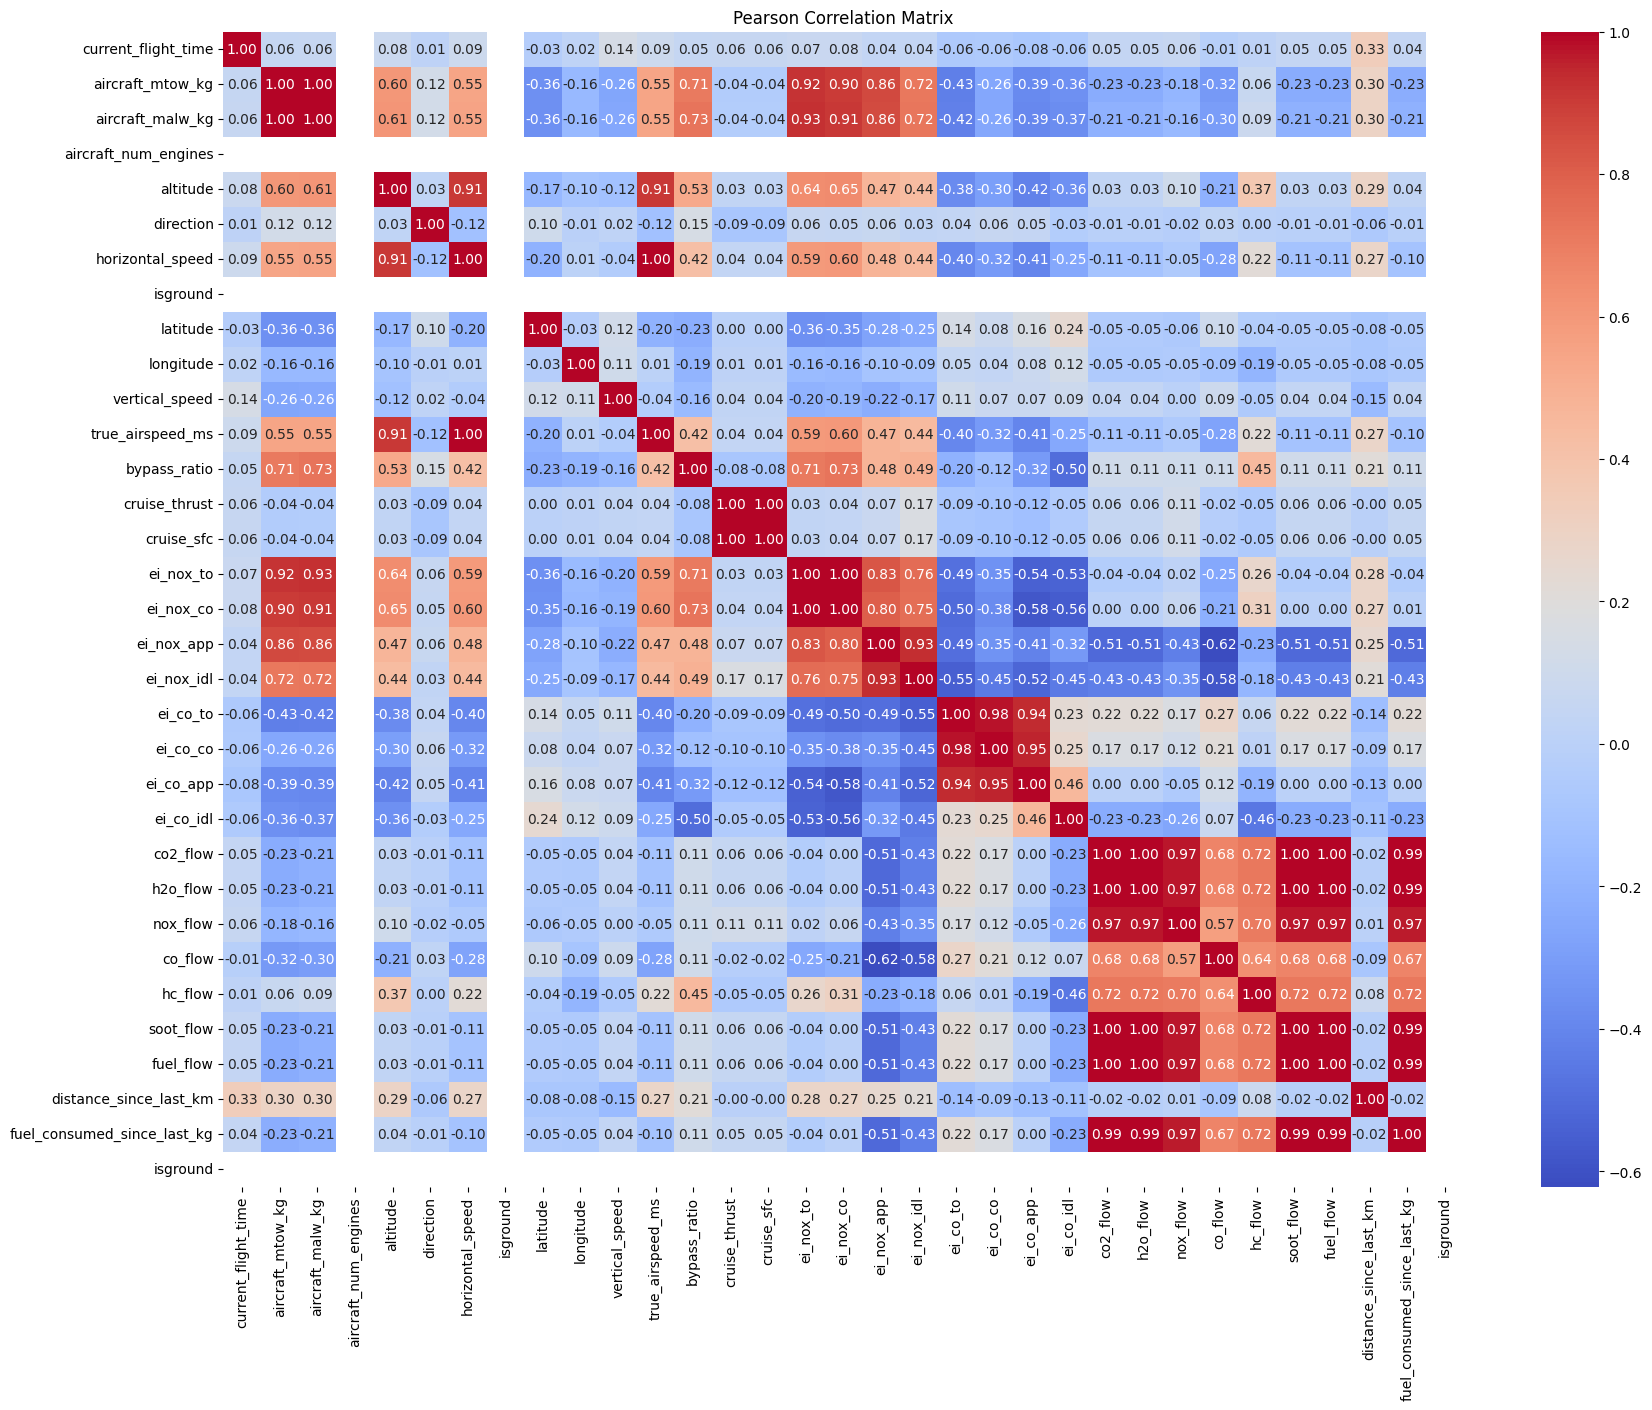

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

non_object_columns = flights_data_resampled.select_dtypes(exclude=['object']).columns
numerical_features = non_object_columns.to_list()
numerical_features.append('isground')
plt.figure(figsize=(20, 15))
sns.heatmap(flights_data_resampled[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Pearson Correlation Matrix")